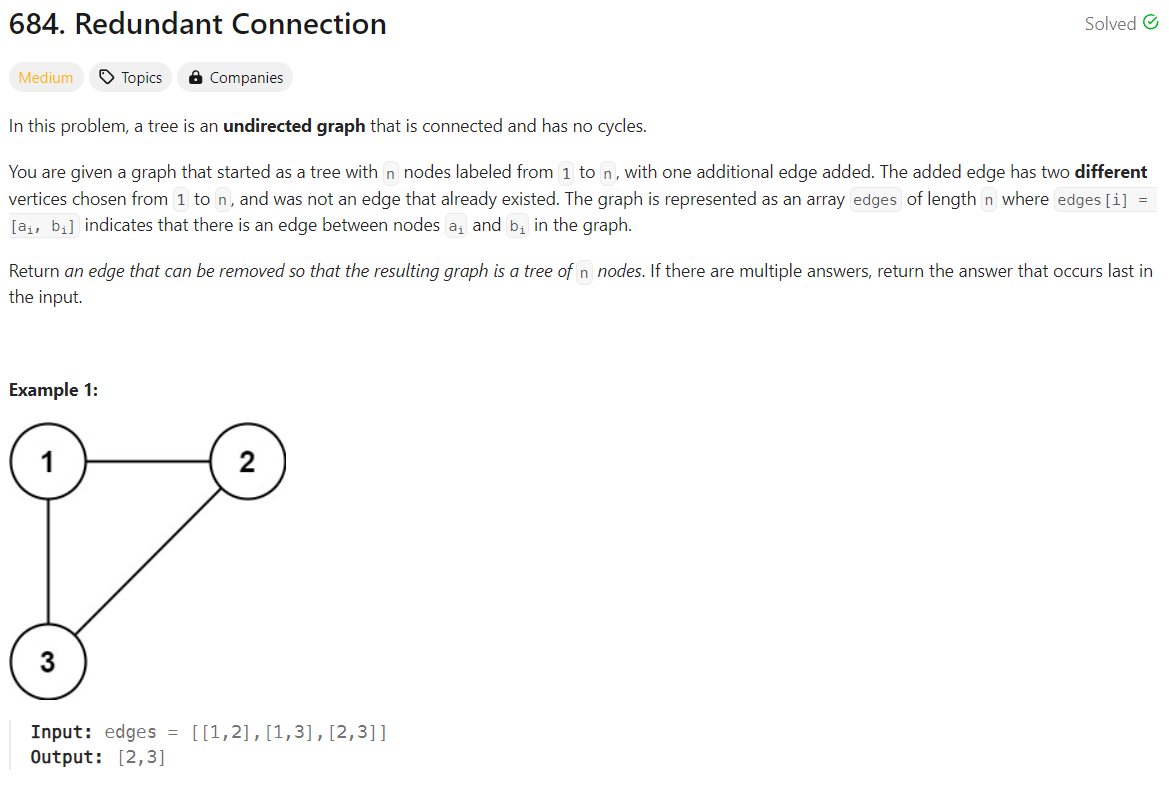

In [ ]:
# Solution 1
from collections import defaultdict
class Solution:
    def findRedundantConnection(self, edges: List[List[int]]) -> List[int]:
        # Create a adjencency list
        adjMap = defaultdict(list)
        for idx, (v0, v1) in enumerate(edges):
            adjMap[v0].append((idx, v1))
            adjMap[v1].append((idx, v0))
            
        # Find path that the loop happend
        seen = set()
        def dfs(node, prev_node=-1, path=None):
            nonlocal adjMap, seen
            if path is None:
                path = []
            if node in seen:
                return path
            seen.add(node)
            for idx, next_node in adjMap[node]:
                if next_node != prev_node:
                    new_path = path + [(idx, node, next_node)]
                    res = dfs(next_node, node, new_path)
                    if res is not None:
                        return res
            return None
        
        # Remove the vertecis that are not in the loop
        cyclePath = dfs(1)
        endVertex = cyclePath[-1][-1]
        for idx, edge in enumerate(cyclePath):
            if edge[1] == endVertex:
                break
        # Find the edge that happends last in the list and sort it
        return sorted(max(cyclePath[idx:])[1:])

In [ ]:
# Solution 2 
# UnionFind Algorithm
class Solution:
    def findRedundantConnection(self, edges: List[List[int]]) -> List[int]:
        parents = [i for i in range(1001)]
        size = [1 for i in range(1001)]

        def find(n):
            if parents[n] == n:
                return n
            
            parents[n] = find(parents[n])
            return parents[n]
        
        def union(n1, n2):
            parent1, parent2 = find(n1), find(n2)
            if parent1 == parent2:
                return False # this edge will cause the loop
            
            (bn, bp), (sn, sp) = [(n1, parent1), (n2, parent2)] if size[n1] > size[n2] else [(n2, parent2), (n1, parent1)]
            parents[sp] = bp
            size[bp] += size[sp]
            return True
        
        for edge in edges:
            if union(*edge) == False:
                return edge